In [1]:
import numpy as np
import matplotlib.pyplot as plt

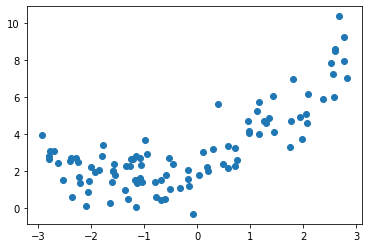

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)
plt.show()

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=666)

In [4]:
X_train.shape

(75, 1)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []

for i in range(1, 76):
    lin_reg = LinearRegression()
    lin_reg.fit(X_train[:i], y_train[:i])
    
    y_train_predict = lin_reg.predict(X_train[:i])
    train_score.append(
        mean_squared_error(y_train[:i], y_train_predict))
    y_test_predict = lin_reg.predict(X_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

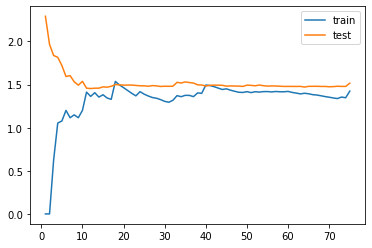

In [6]:
plt.plot([i for i in range(1, 76)],
         np.sqrt(train_score),
         label="train")
plt.plot([i for i in range(1, 76)],
         np.sqrt(test_score),
         label="test")
plt.legend()
plt.show()

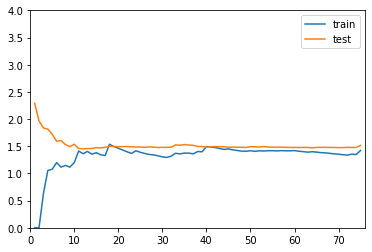

In [7]:
def plot_learning_curve(algo, X_train, X_test, y_train, y_test):
    train_score = []
    test_score = []

    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])

        y_train_predict = algo.predict(X_train[:i])
        train_score.append(
            mean_squared_error(y_train[:i], y_train_predict))
        
        y_test_predict = algo.predict(X_test)
        test_score.append(
            mean_squared_error(y_test, y_test_predict))
    
    plt.plot([i for i in range(1, len(X_train)+1)],
              np.sqrt(train_score), label='train')
    plt.plot([i for i in range(1, len(X_train)+1)],
              np.sqrt(test_score), label='test')
              
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 4])
    plt.show()
              
plot_learning_curve(LinearRegression(), X_train, X_test, y_train, y_test)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

def polynomial_regression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression())
    ])

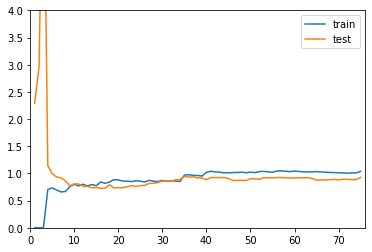

In [9]:
poly_2_reg = polynomial_regression(degree=2)
plot_learning_curve(poly_2_reg, X_train, X_test, y_train, y_test)

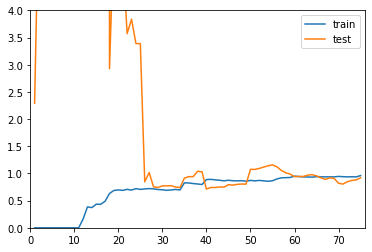

In [10]:
poly_10_reg = polynomial_regression(degree=10)
plot_learning_curve(poly_10_reg, X_train, X_test, y_train, y_test)